In [1]:
!pwd
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!python3 -m pip install --upgrade Pillow

print("Setup Colab..")
from fastbook import *
from fastai.vision.widgets import *

/content
Requirement already up-to-date: Pillow in /usr/local/lib/python3.6/dist-packages (7.2.0)
Setup Colab..


In [2]:
#hide


key = '709b8f9a58ed4054a4ddb82f16b8c527'
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
print(ims)
print(ims[0])

(#150) ['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg','http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/1200px-GrizzlyBearJeanBeaufort.jpg','https://upload.wikimedia.org/wikipedia/commons/e/e2/Grizzlybear55.jpg','http://3.bp.blogspot.com/-6VJBVEQKaFc/TgbRVFNtahI/AAAAAAAAAFY/BpIqDsfc9JY/s1600/102487-050-BD924456.jpg','http://2.bp.blogspot.com/-NHxROh-qE2w/USOjxfWt_pI/AAAAAAAAFBA/8msDxZNdvZ0/s1600/Grizzly_Bear_Info_Images+03.jpg','http://i4.mirror.co.uk/incoming/article6580991.ece/ALTERNATES/s615/Grizzly-Bear.jpg','http://3.bp.blogspot.com/-DFDj2euc1MI/UHzV4UVwG_I/AAAAAAAAA-o/IEASyT5BT_A/s1600/Grizzly+Bear.jpg','http://1.bp.blogspot.com/-LTcOAGP_Nf4/USOjNXJTTBI/AAAAAAAAFAo/NmgLmnRKEOw/s1600/Grizzly_Bear_Info_Images+04.jpg','http://s1.ibtimes.com/sites/www.ibtimes.com/files/2011/07/07/12619

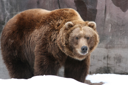

In [3]:
dest = 'images/grizzly.jpg'
path = Path('images')
if not path.exists():
  path.mkdir()
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)


In [4]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [5]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_url'))

In [6]:
fns = get_image_files(path)

failed = verify_images(fns)
failed.map(Path.unlink);


In [7]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.277776,0.166308,0.071429,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.191090,0.088580,0.023810,00:18
1,0.139344,0.079843,0.023810,00:18
2,0.111975,0.079309,0.023810,00:18
3,0.087490,0.077401,0.023810,00:18


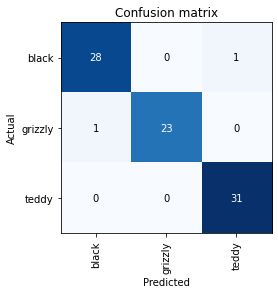

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')



(#1) [Path('export.pkl')]

In [12]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

In [15]:
!pip install voila
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    pred,pred_idx,probs = learn_inf.predict(img)
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

import voila
!jupyter serverextension enable voila --sys-prefix



Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
